In [188]:
# %pip install snscrape
# %pip install pandas
# %pip install matplotlib
import snscrape.modules.twitter as sn
import pandas as pd
import matplotlib.pyplot as plt

In [177]:
# https://medium.com/dataseries/how-to-scrape-millions-of-tweets-using-snscrape-195ee3594721
# startdate = ''
# enddate = ''
# interval = '1d'
# user = ''
# keywords = 'boredapeyc'
query = 'veefriends -is:retweet -is:quoted'
tweets = []
limit = 1000


for tweet in sn.TwitterSearchScraper(query).get_items():
    if len(tweets) == limit:
        break

    else: 
      tweets.append([tweet.date, 
                     tweet.user,
                     tweet.user.username,
                     tweet.content, 
                     tweet.id,
                     tweet.url,
                     tweet.replyCount, 
                     tweet.retweetCount, 
                     tweet.likeCount, 
                     tweet.quoteCount, 
                     tweet.mentionedUsers,
                     tweet.lang,
                     tweet.retweetedTweet,
                     tweet.quotedTweet,
                     tweet.media,
                     tweet.outlinks,
                     tweet.tcooutlinks])

        
df = pd.DataFrame(tweets, columns=['date', 'user', 'username','content', 'tweet_id', 'url', 'replies', 'retweets','likes', 'quotes', 'mentioned_users', 'lang', 'retweet_source', 'quoted_source', 'media', 'outlinks', 'tcooutlinks'])
df['mentioned_users_count'] = [len(x) if type(x)==list else 0 for x in df.mentioned_users]

df


,date,user,username,content,tweet_id,url,replies,retweets,likes,quotes,mentioned_users,lang,retweet_source,quoted_source,media,outlinks,tcooutlinks,mentioned_users_count
0,2022-09-05 04:44:18+00:00,https://twitter.com/BrianNyc14,BrianNyc14,@metadannyeth @garyvee @veefriends ❤️,1566648392729722880,https://twitter.com/BrianNyc14/status/15666483...,0,0,0,0,"[https://twitter.com/metadannyeth, https://twi...",und,None,None,None,None,None,3
1,2022-09-05 04:43:49+00:00,https://twitter.com/Zulecrist12,Zulecrist12,"@DarthDegen @itsjshep Not always, have you see...",1566648273045266433,https://twitter.com/Zulecrist12/status/1566648...,0,0,0,0,"[https://twitter.com/DarthDegen, https://twitt...",en,None,None,None,None,None,4
2,2022-09-05 04:43:33+00:00,https://twitter.com/VeeFriends2Sale,VeeFriends2Sale,New VeeFriends Series 2 Sale ⭐\nPrice: 0.35Ξ (...,1566648206070468610,https://twitter.com/VeeFriends2Sale/status/156...,0,0,0,0,None,en,None,None,[Photo(previewUrl='https://pbs.twimg.com/media...,None,None,0
3,2022-09-05 04:43:33+00:00,https://twitter.com/VeeFriends2Sale,VeeFriends2Sale,New VeeFriends Series 2 Sale ⭐\nPrice: 0.31Ξ (...,1566648202626940930,https://twitter.com/VeeFriends2Sale/status/156...,0,0,0,0,None,en,None,None,[Photo(previewUrl='https://pbs.twimg.com/media...,None,None,0
4,2022-09-05 04:43:22+00:00,https://twitter.com/VeeFriends2bot,VeeFriends2bot,Outgoing Octopus #52845 was purchased for 0.35...,1566648159811649536,https://twitter.com/VeeFriends2bot/status/1566...,0,0,0,0,None,en,None,None,[Photo(previewUrl='https://pbs.twimg.com/media...,[https://opensea.io/accounts/0xf88ace04fd08d42...,"[https://t.co/N67FlMhS1Z, https://t.co/ZMz2olV...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2022-09-03 23:44:29+00:00,https://twitter.com/nft137,nft137,@garyvee And from a black cat holder @veefrien...,1566210552870871041,https://twitter.com/nft137/status/156621055287...,0,0,6,0,"[https://twitter.com/garyvee, https://twitter....",en,None,None,None,None,None,3
996,2022-09-03 23:43:43+00:00,https://twitter.com/mccownhomes,mccownhomes,@zhan2ar @garyvee @veefriends I've just been w...,1566210360566198272,https://twitter.com/mccownhomes/status/1566210...,1,0,1,0,"[https://twitter.com/zhan2ar, https://twitter....",en,None,None,None,None,None,3
997,2022-09-03 23:42:06+00:00,https://twitter.com/zhan2ar,zhan2ar,@mccownhomes @garyvee @veefriends Why are keep...,1566209953043517440,https://twitter.com/zhan2ar/status/15662099530...,1,0,0,0,"[https://twitter.com/mccownhomes, https://twit...",en,None,None,None,None,None,3
998,2022-09-03 23:41:35+00:00,https://twitter.com/mccownhomes,mccownhomes,@zhan2ar @garyvee @veefriends I must be patien...,1566209825054158848,https://twitter.com/mccownhomes/status/1566209...,1,0,1,0,"[https://twitter.com/zhan2ar, https://twitter....",en,None,None,[Photo(previewUrl='https://pbs.twimg.com/media...,None,None,3


In [182]:
# Calculate social engagement metrics
resample_interval = '5min'
df['count'] = 1
rs = df.resample(resample_interval, on = 'date', origin = 'start_day')
df_agg = rs[['count', 'replies', 'likes', 'retweets', 'quotes']].sum()

# Number of unique contributors
df_unique_users = df.drop_duplicates(subset='username')
df_agg['contributors'] = df_unique_users.resample(resample_interval, on = 'date', origin = 'start_day')['count'].sum()


<AxesSubplot:xlabel='date'>

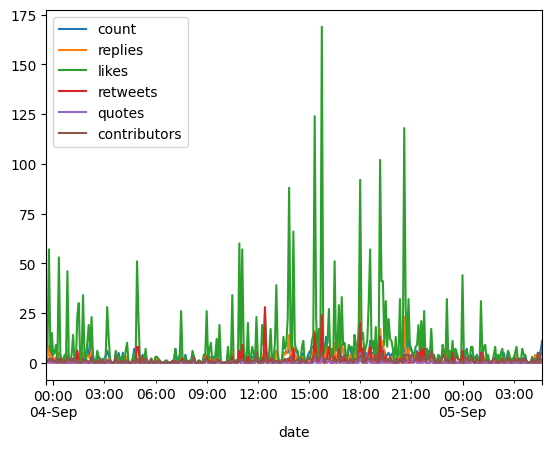

In [189]:
df_agg.plot()